# CREDIT CARD FRAUD DETECTION

- Build a machine learning model to identify fraudulent credit card transactions.
- Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
- Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
- Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

# Data

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

#### 1 - Data Preprocessing

In [61]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [62]:
#load dataset

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
df.shape #it contains 284807 rows and 31 columns

(284807, 31)

In [64]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [65]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [66]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [67]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

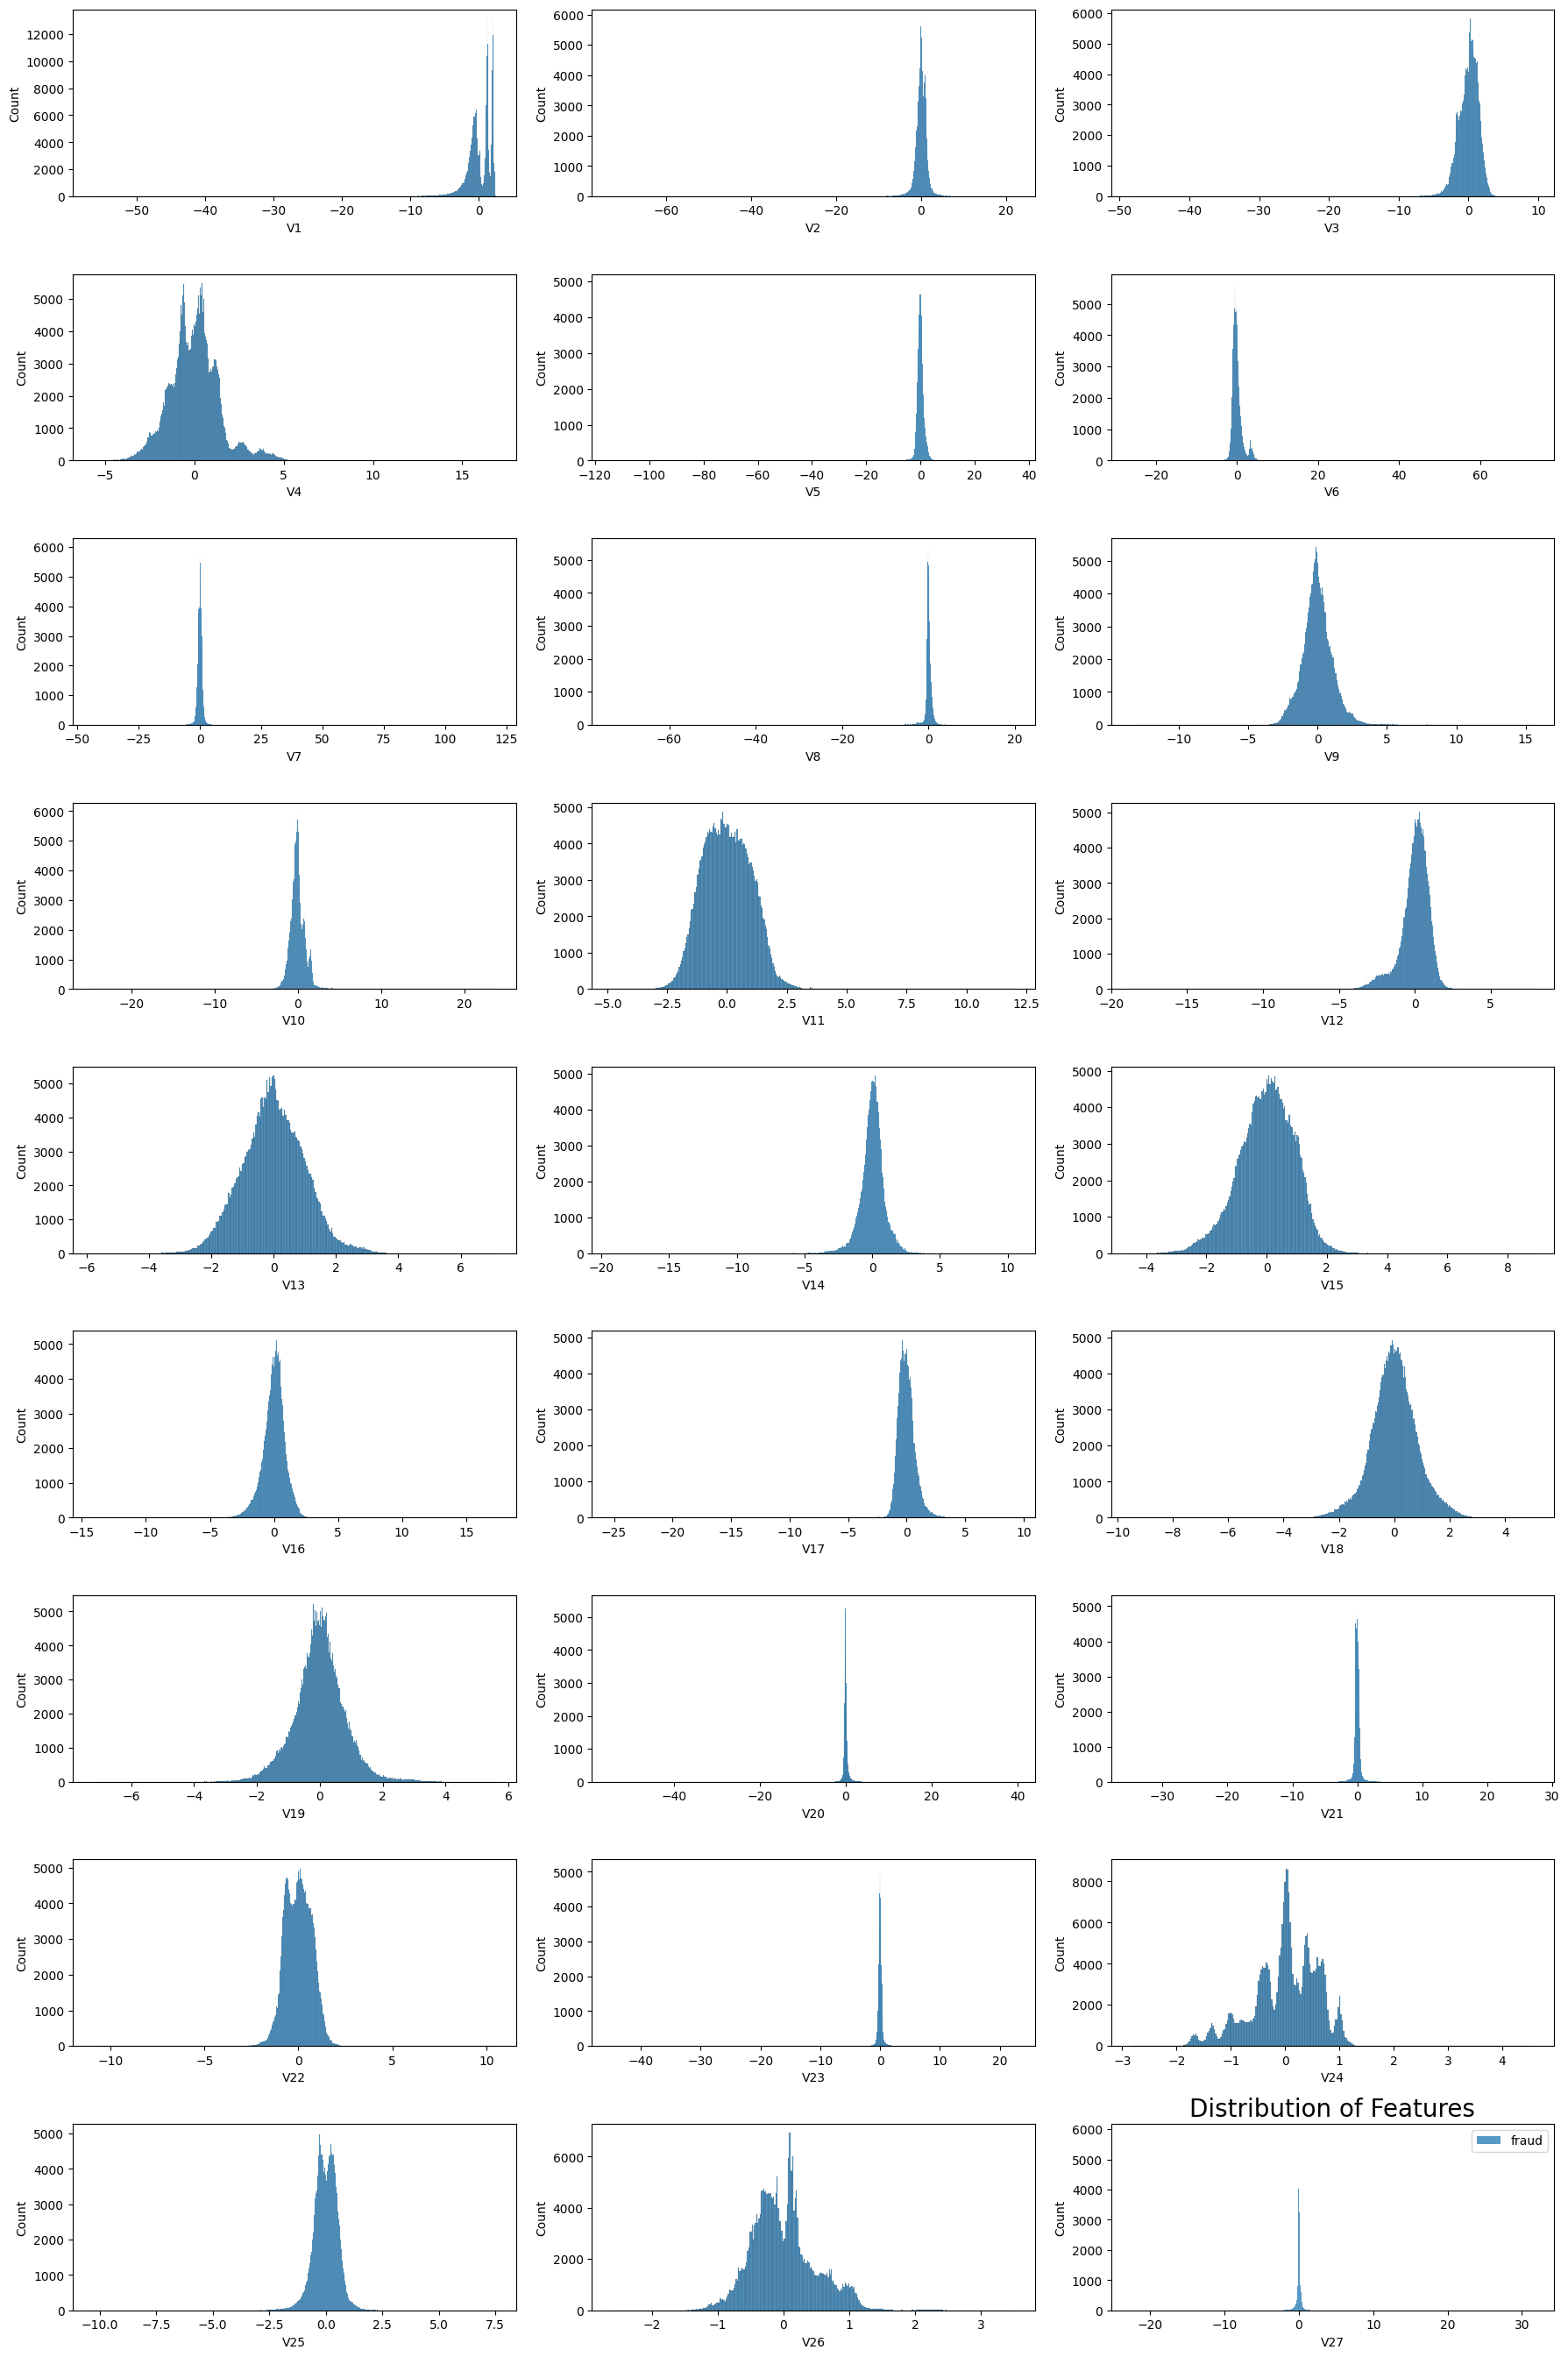

In [68]:
#Distribution of all features from V1 - V28

fig,ax = plt.subplots(9,3,figsize=(18, 27))
ax = ax.flatten()
for i,column in enumerate(df.columns[1:28]):

    sns.histplot(data=df, x=df[column], ax=ax[i])
plt.title('Distribution of Features',fontsize=20)
plt.legend(labels=['fraud','regular transaction'])
plt.tight_layout()
plt.show()

One can notice that at least half of the Vi distributions (i = 1, ..., 28) are different in the fraud and regular transaction cases. This, in combination with Amount, will hopefully make it possible to distinguish between the two classes in the classification procedure.

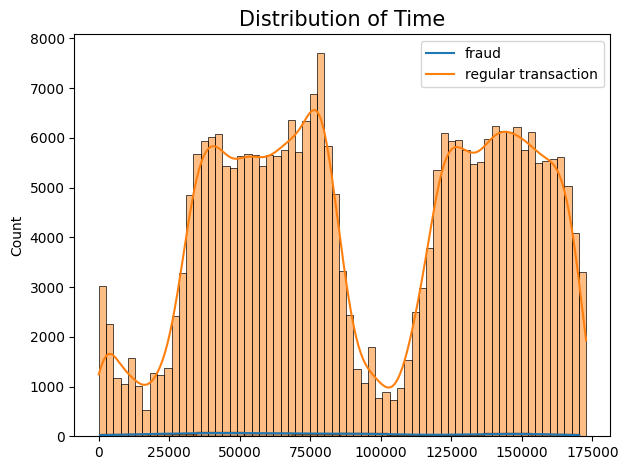

In [69]:
# Distribution of Time
sns.histplot(df['Time'][df.Class == 1], kde=True)
sns.histplot(df['Time'][df.Class == 0], kde=True)
plt.xlabel('')
plt.title('Distribution of Time',fontsize=15)
plt.legend(labels=['fraud','regular transaction'])

plt.tight_layout()
plt.show()

The time distributions of frauds and regular transactions are rather different.

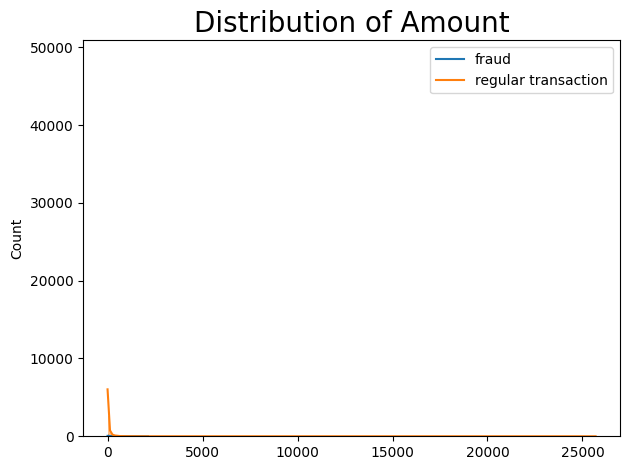

In [70]:
# Distribution of Amount
sns.histplot(df['Amount'][df.Class == 1], kde=True)
sns.histplot(df['Amount'][df.Class == 0], kde=True)
plt.xlabel('')
plt.title('Distribution of Amount',fontsize=20)
plt.legend(labels=['fraud','regular transaction'])
  
plt.tight_layout()
plt.show()

The amount distribution of frauds is peaked only in the small amounts of money.

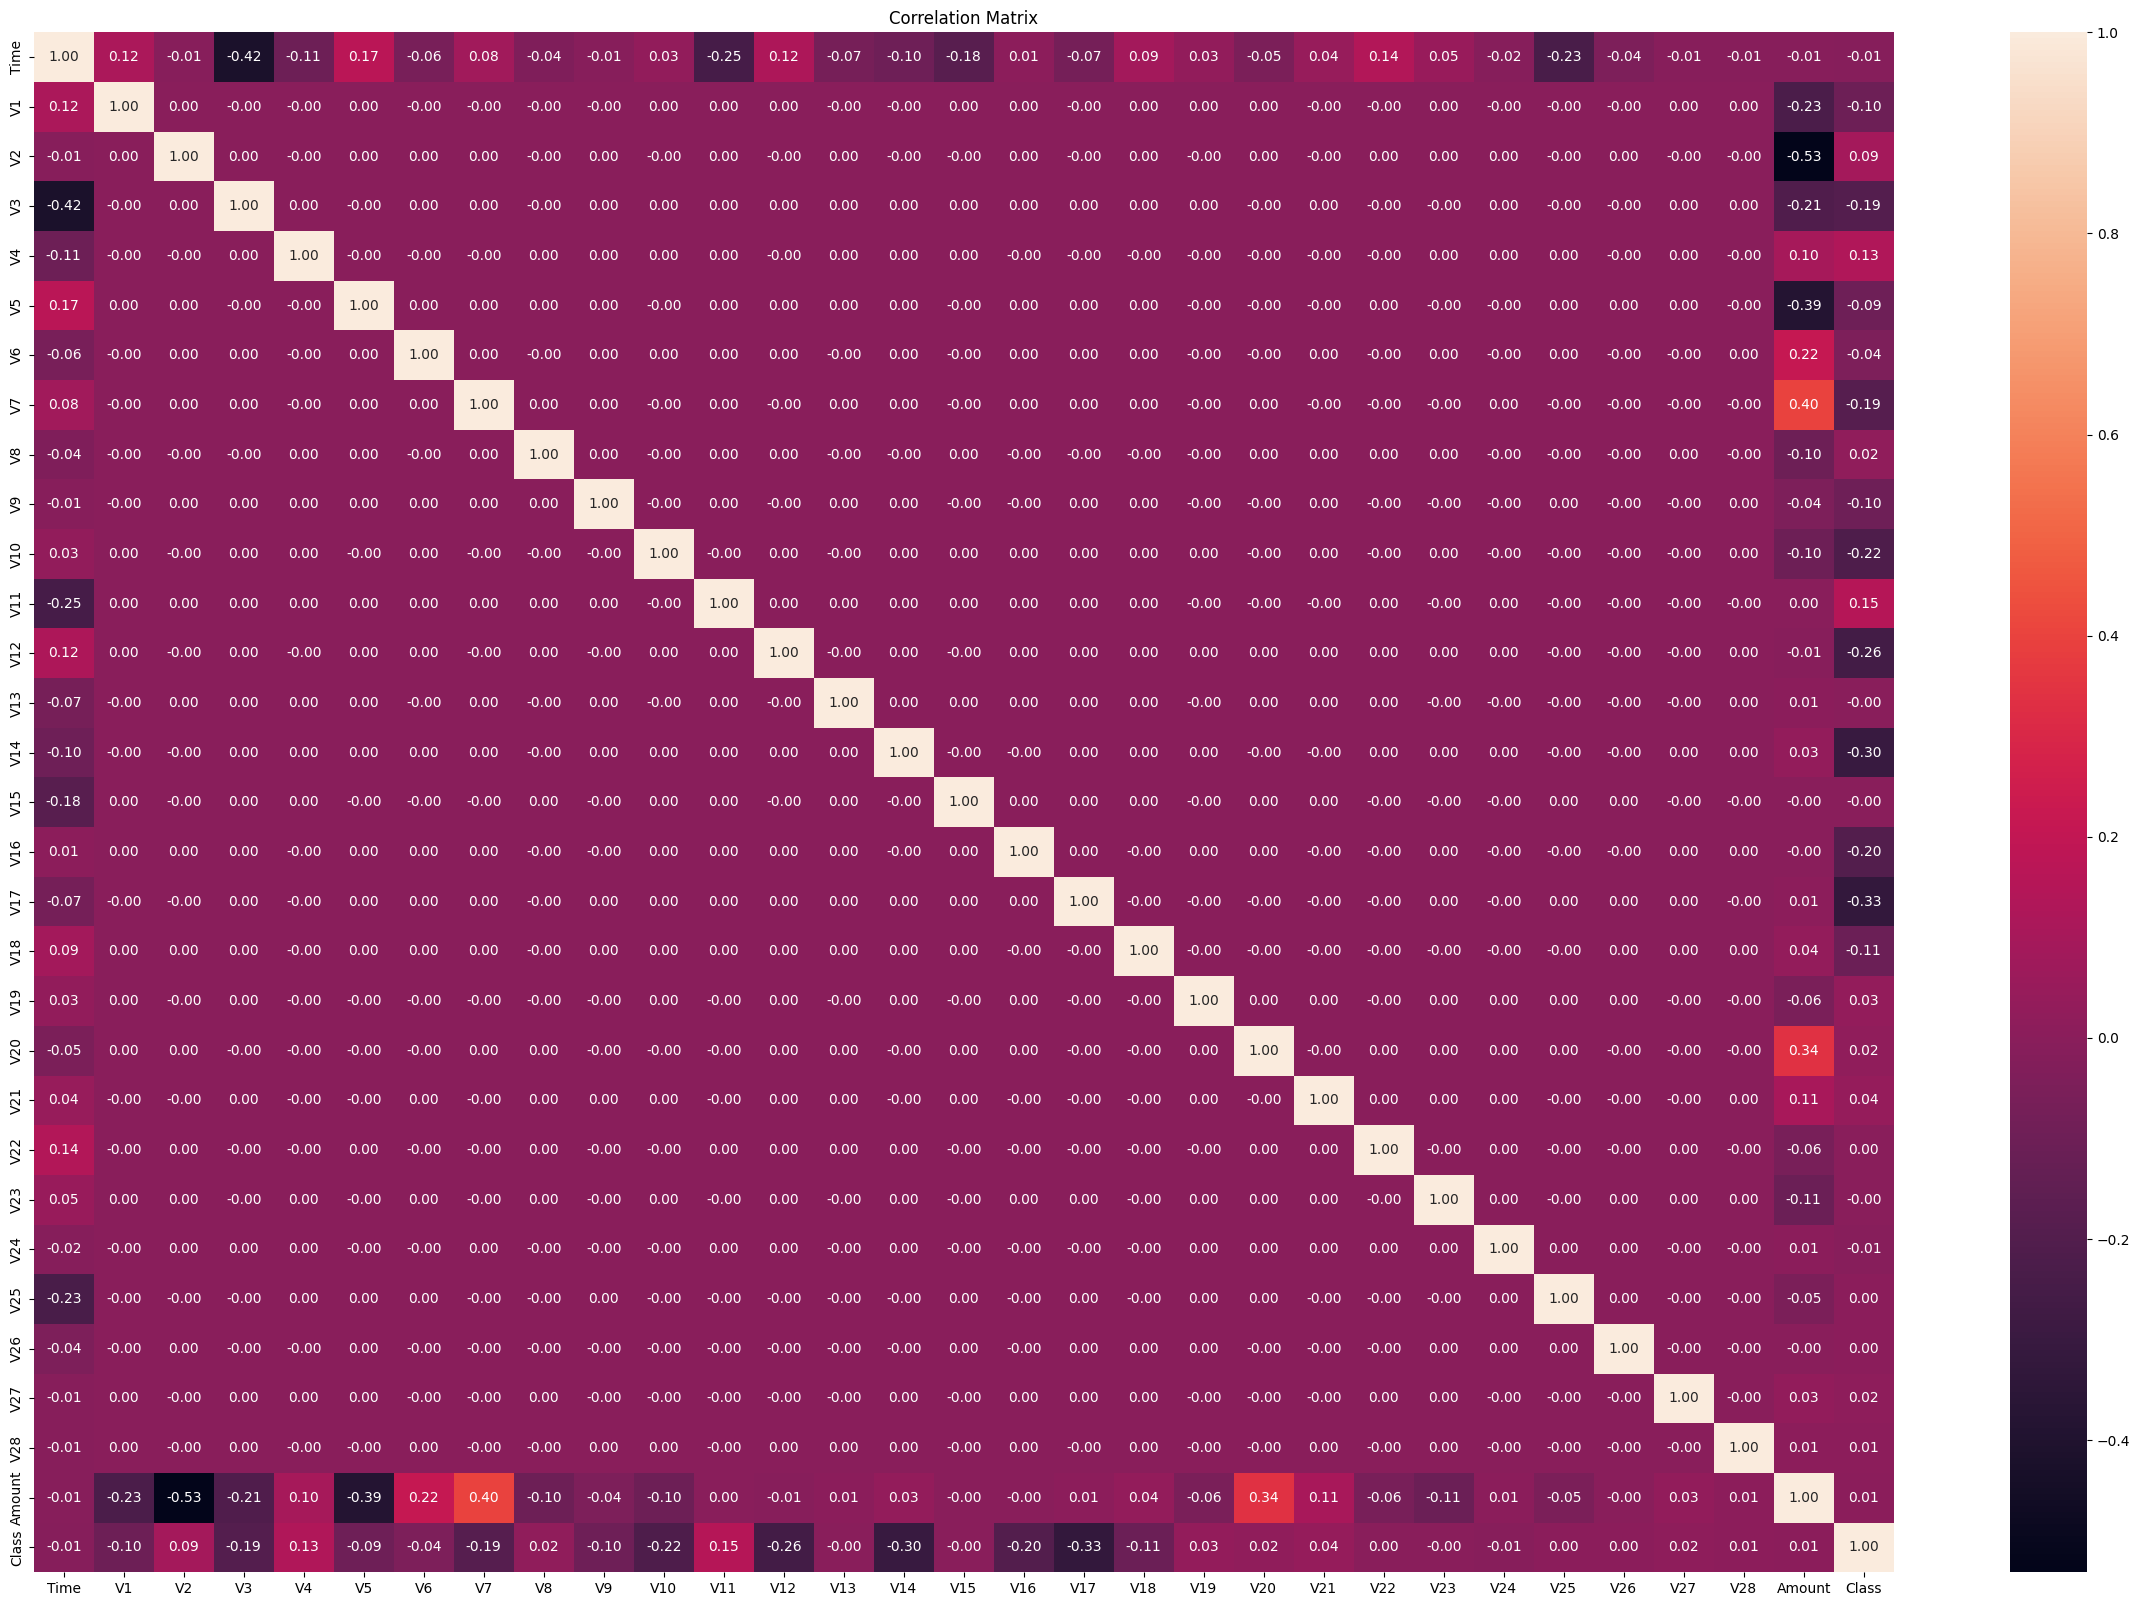

In [71]:
# Feaure selection using correlation
# Plot the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True, cbar='coolwarm', fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()

In [72]:
target_variable = 'Class'
correlation_threshold = 0.13

# Drop features with correlation less than 0.10 with the target variable
df_filtered = df.drop(columns=[col for col in df.columns if abs(df.corr()[target_variable][col]) < correlation_threshold and col != target_variable])

print(f"Features dropped: {[col for col in df.columns if abs(df.corr()[target_variable][col]) < correlation_threshold and col != target_variable]}")
print(f"Remaining features: {list(df_filtered.columns)}")

Features dropped: ['Time', 'V1', 'V2', 'V5', 'V6', 'V8', 'V9', 'V13', 'V15', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Remaining features: ['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class']


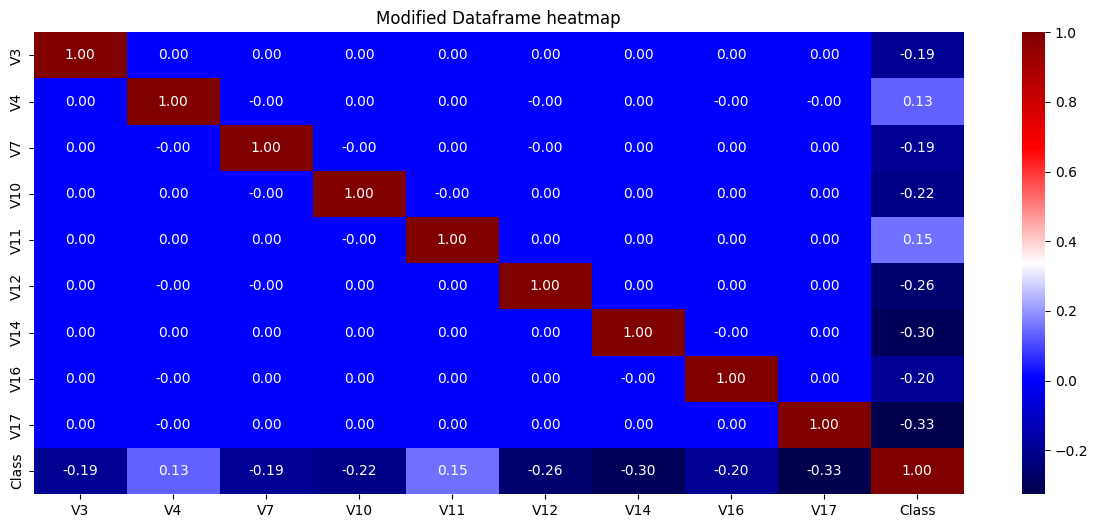

In [73]:
plt.figure(figsize=(15,6))
plt.title('Modified Dataframe heatmap')
sns.heatmap (df_filtered.corr(), annot=True, fmt='0.2f', cmap='seismic')
plt.show()

##### Hence we have removed the columns which has less corrrelation, we should check for available outliers in the features we have filtered

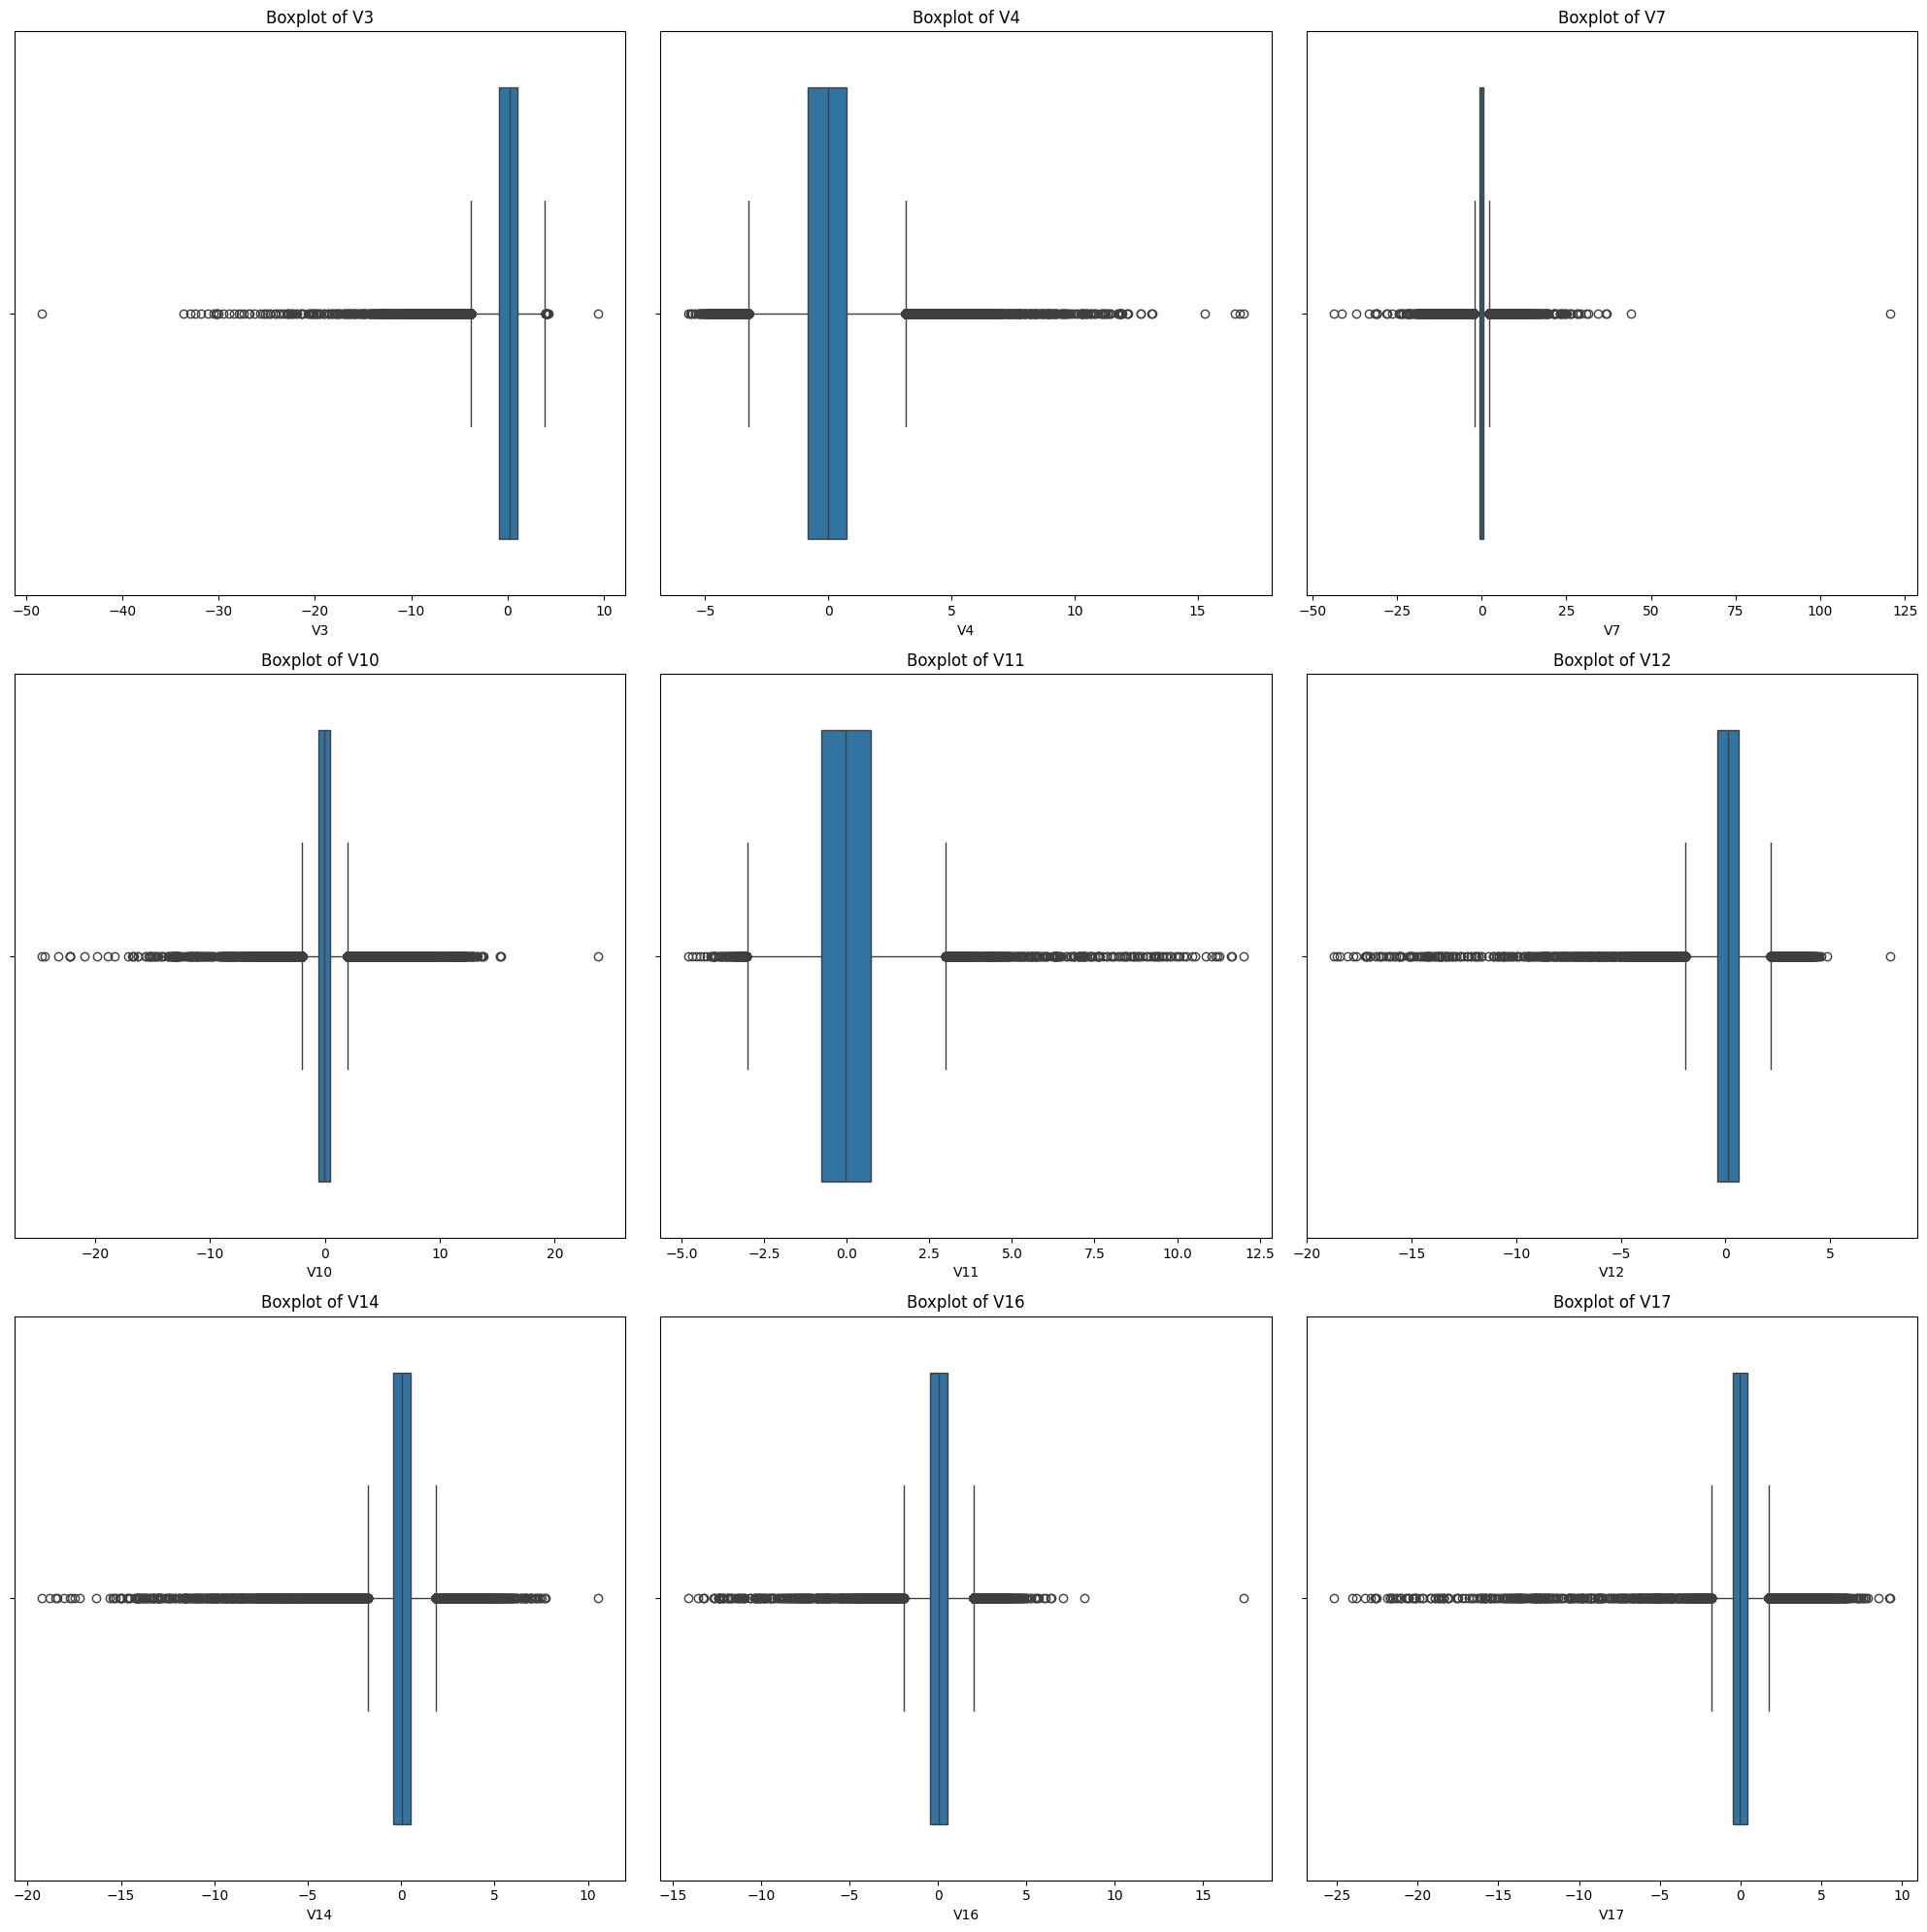

In [74]:
#checking outliers with box plot for features
remaining_features = df_filtered.columns.tolist()
remaining_features.remove(target_variable)  # Exclude the target variable from the boxplots

# Plotting boxplots for each remaining feature
fig, axes = plt.subplots(3,3,figsize=(20,20))
axes = axes.flatten()
for i, feature in enumerate(remaining_features):
    sns.boxplot(data=df_filtered, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


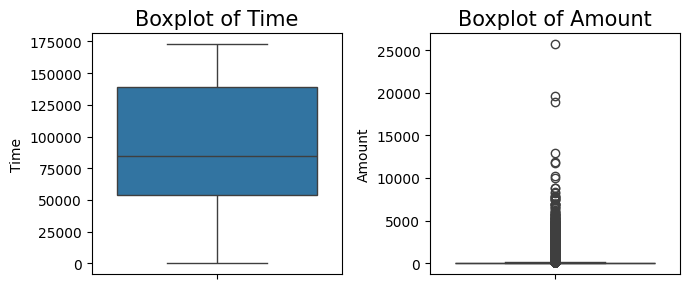

In [75]:

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(7,3))

ax1 = sns.boxplot(df['Time'],ax=ax1)
ax1.set_title('Boxplot of Time',fontsize=15)

ax2 = sns.boxplot(df['Amount'],ax=ax2)
ax2.set_title('Boxplot of Amount',fontsize=15)


plt.tight_layout()


In [105]:
# Split the data into X,y 
X = df.drop(columns = ['Class'], axis= 1)
y = df['Class']

# scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
y=y.values.reshape(-1,1)
y_scaled=scaler.fit_transform(y)

# Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [106]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
13367,23610.0,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,...,-0.469630,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,31.35
31788,36516.0,1.021179,-0.194114,1.207791,1.738369,-0.659824,0.631864,-0.434168,0.227422,1.116400,...,-0.090960,-0.386993,-0.664598,0.047173,0.106897,0.443932,-0.515898,0.091188,0.035959,41.29
84796,60465.0,-1.134453,0.636843,2.457241,1.317848,0.605755,0.143546,0.242076,0.371466,-1.315582,...,-0.040412,0.328508,0.683118,-0.114294,0.203942,0.035426,-0.090987,0.057247,0.102961,23.27
6243,7309.0,-0.851343,0.062000,1.406917,-1.669375,0.462639,-0.150804,0.403887,0.200460,1.968672,...,-0.301203,-0.400262,-1.096108,0.023423,-0.842077,-0.301144,0.932506,-0.088128,0.076487,45.00
162432,115111.0,-0.040314,0.545458,0.831788,-0.515723,0.128584,-0.112466,0.027800,0.222503,0.639397,...,-0.120943,0.102439,0.351638,0.180840,0.572238,-1.486248,0.147366,0.253324,0.291266,9.84


In [107]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76


In [110]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {y_train.shape}')
print(f'Y_test shape: {y_test.shape}')


X_train shape: (227845, 30)
X_test shape: (56962, 30)
Y_train shape: (227845, 1)
Y_test shape: (56962, 1)


UnderSampling is best approach for this data
- Problem with Oversampling - Class - 1 Data is very less therefore synthetically generated Data isnot the representation of the actual Data .  
- Generating  more than 800,000 samples from 492 samples is probably a huge mistake.
- Therefore i have used RandomUnderSampler for undersampling .

In [111]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=7)
X_res, y_res =rus.fit_resample(X_train,y_train)

print(f' shape of X_res_rus: {X_res.shape}, shape of Y_res_rus: {y_res.shape}')


 shape of X_res_rus: (810, 30), shape of Y_res_rus: (810,)


In [103]:
# importing evaluation metrics

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [113]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_pred,y_test)*100)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 99.91397773954567
[[56862    36]
 [   13    51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56898
           1       0.59      0.80      0.68        64

    accuracy                           1.00     56962
   macro avg       0.79      0.90      0.84     56962
weighted avg       1.00      1.00      1.00     56962



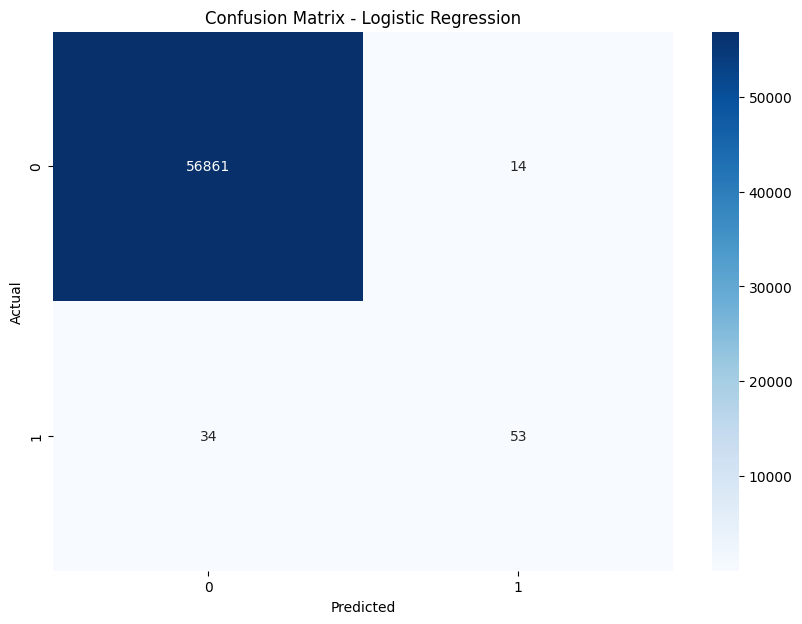

In [125]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_pred,y_test)*100)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy Score: 99.95259997893332
[[56870    22]
 [    5    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56892
           1       0.75      0.93      0.83        70

    accuracy                           1.00     56962
   macro avg       0.87      0.96      0.91     56962
weighted avg       1.00      1.00      1.00     56962



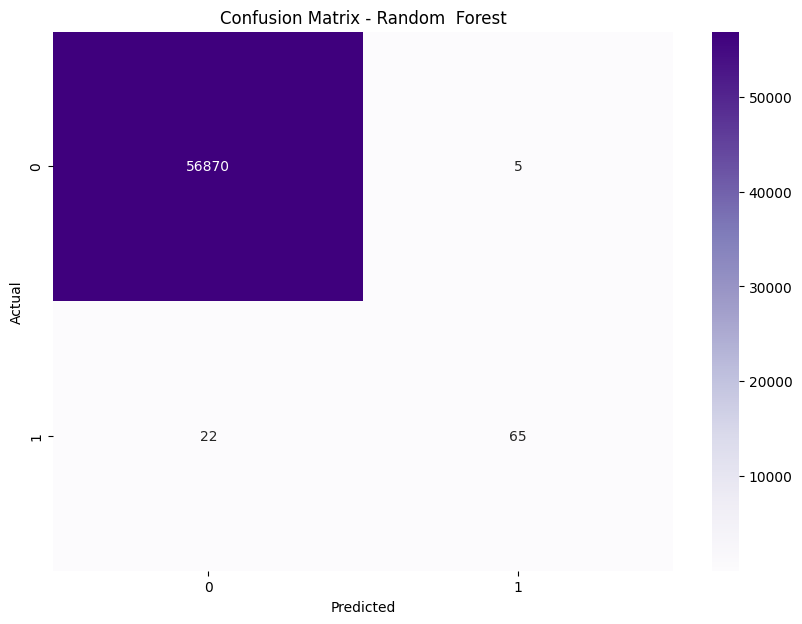

In [120]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random  Forest')
plt.show()

In [121]:
from sklearn.ensemble import AdaBoostClassifier
rf_model = AdaBoostClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_pred,y_test)*100)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 99.91573329588147
[[56861    34]
 [   14    53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56895
           1       0.61      0.79      0.69        67

    accuracy                           1.00     56962
   macro avg       0.80      0.90      0.84     56962
weighted avg       1.00      1.00      1.00     56962



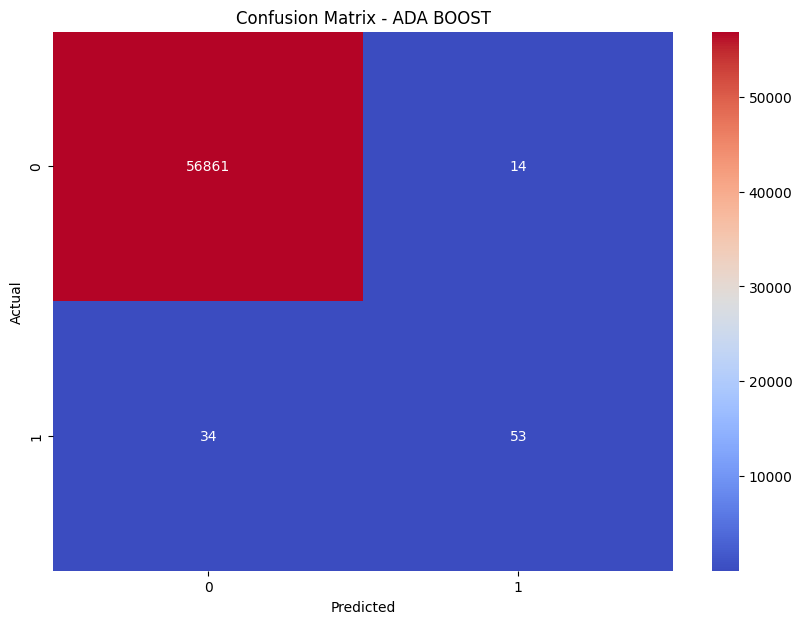

In [123]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ADA BOOST')
plt.show()